# Исследование компьютерных игр

**Задача проекта:** Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Данные предоставлены до 2016 года.

**Описание данных**

- *Name* — название игры
- *Platform* — платформа
- *Year_of_Release* — год выпуска
- *Genre* — жанр игры
- *NA_sales* — продажи в Северной Америке (миллионы проданных копий)
- *EU_sales* — продажи в Европе (миллионы проданных копий)
- *JP_sales* — продажи в Японии (миллионы проданных копий)
- *Other_sales* — продажи в других странах (миллионы проданных копий)
- *Critic_Score* — оценка критиков (максимум 100)
- *User_Score* — оценка пользователей (максимум 10)
- *Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Изучение общей информации


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('games.csv', sep=',')
except Exception:
    data = pd.read_csv('/datasets/games.csv', ',')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
def pass_value_barh(df):
    (
        (df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind= 'barh', figsize=(19,6), legend = False, fontsize = 16)
        .set_title('Процент пропусков по колонкам' + "\n", fontsize = 22, color = 'SteelBlue')    
    );    

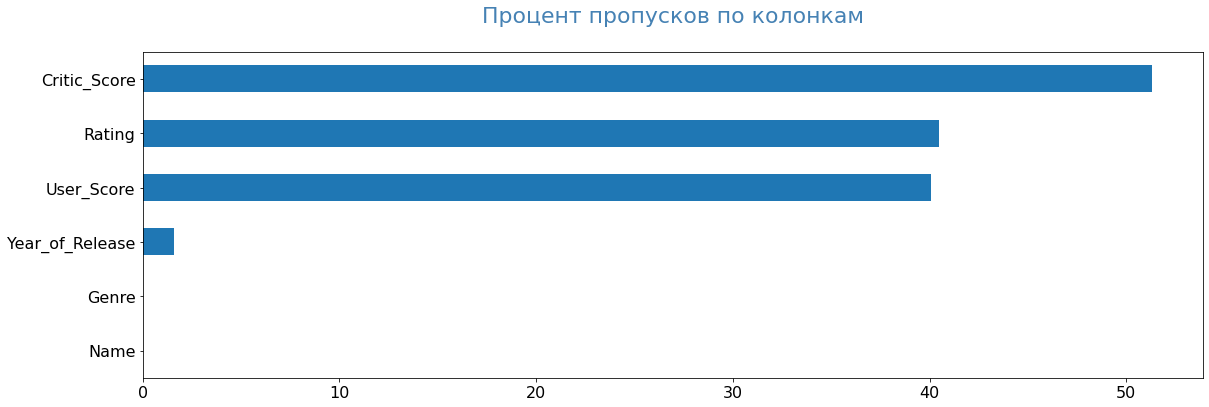

In [5]:
pass_value_barh(data)

## Подготовка данных

Приводим навания столбцов к нижнему регистру

In [6]:
data.columns = data.columns.str.lower()

In [7]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Перед тем как менять тип данных избавимся от пропусков там, где это возможно. В столбце `year_of_release` есть пропуски, но их менее 5% от общего объема данных, что не является критичным.

In [8]:
print(round(len(data.query('year_of_release.isnull()')) / len(data) * 100, 1), '%')

1.6 %


In [9]:
data = data.dropna(subset=['year_of_release'])

Проверим пропуски в столбце `name` и `genre`. Так как это две строки в которых пропуски в сразу в двух этих столбцах, их тоже удаляем.


In [10]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
data = data.dropna(subset=['name'])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Рассмотри пропуски в столбцах `critic_score`, `user_score` и `rating`. Заполнять пропуски медианными или средними значениями в `critic_score` и `user_score`некорректно, так как их более 40% и это исказит данные. Столбец `rating` оставим в исходном виде, так как это рейтинг от организации ESRB и спрогнозировать его на основе имеющихся данных нельзя. 

In [13]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [14]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Значение 'tbd' означет что оценка будет проставлена позже. Соответственно эти данные мы можем обозначить как пропуски.

In [15]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

Теперь изменим типы данных, чтобы в дальнейшем с ними было удобнее работать


In [16]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['user_score'] = data['user_score'].astype('float')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Далее посчитаем суммарные продажи во всех регионах для каждой игры и запишем в отдельный столбец `total_sales`

In [18]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [19]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Посмотрим на оставшиеся пропуски по столбцам.

In [20]:
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

Рассмотрим пропуски в столбце с рейтингом ESRB. Пропуски в этой колонке не являются просто ошибкой заполнения данных, а несут определенную информацию. Что бы проанализировать ее, на пропуски следует поставить заглушку.

In [21]:
data['rating'] = data['rating'].fillna('no_rating')

## Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы

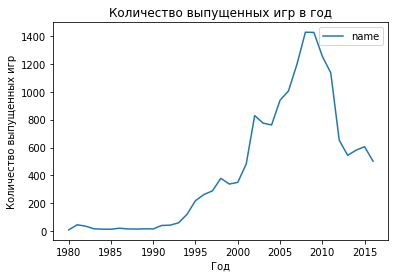

In [22]:
(
    data.pivot_table(index='year_of_release', values='name', aggfunc='count')
    .reset_index()
    .plot(x='year_of_release', y='name', title='Количество выпущенных игр в год')
);
plt.xlabel('Год');
plt.ylabel('Количество выпущенных игр');

Мы видим рост количества выпускаемых игр после 2000 года. Пик приходится на 2007-2008 года. До 1998 года выпускалось заметно меньшее количество игр, так же эти игры, скорее всего, на 2016 г. являются устаревшими, так как выпускались с использованием старых технологий. Брать их в расчет строя прогнозы на 2017 г., на мой взгляд, не стоит.

### Узнаем, как менялись продажи по платформам

Сделаем сводную таблицу и выделим платформы с наибольшими суммарными продажами

In [23]:
top_platforms = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)[:6]
top_platform_names = top_platforms.index

In [24]:
data.query('platform in @top_platform_names').pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')

year_of_release,1985,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
DS,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
PS,NaN,6.03,35.96,94.7,136.17,169.49,144.53,96.37,35.59,6.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PS2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.17,166.43,205.38,...,75.99,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN
PS3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60
Wii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18
X360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95.41,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52


Построим графики распределения продаж по годам для платформ с наибольшими суммарными продажами.

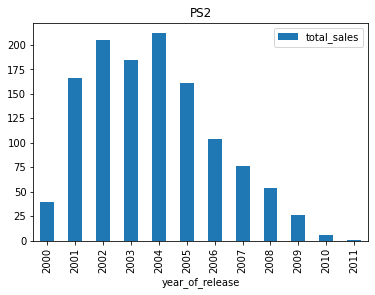

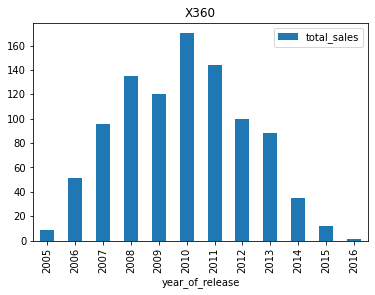

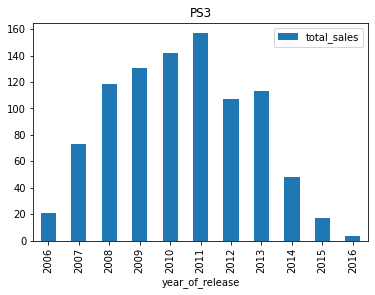

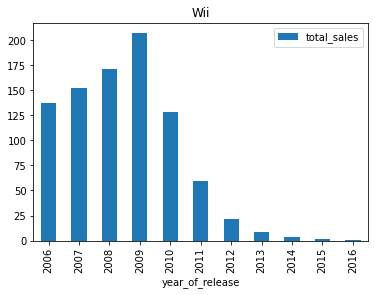

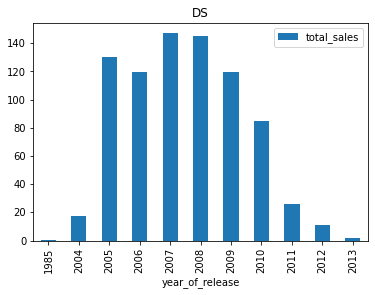

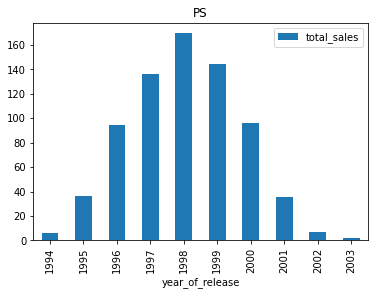

In [25]:
for platform in top_platforms.index:
    (data
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar')
     
    )
    plt.title(platform)
    plt.show()
    

На графиках видно, что жизненный цикл платформ как правило укладывается в 10 лет, то есть за 10 лет появляются новые и исчезают старые платформы. Так же можно увидеть что наибольшее число продаж у платформ приходится на начало либо середину этого цикла и длится примерно 4-5 лет.

### Возьмем данные за актуальный период

Создадим новую переменную с актуальными для нас данными и играми выпущенными после 2013 года, чтобы проанализировать данные за последние 3 года

In [26]:
current_data = data.query('year_of_release > 2013')
current_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no_rating,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_rating,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01


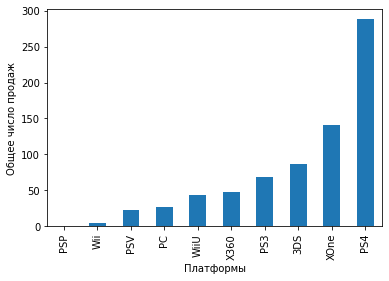

In [27]:
current_data.groupby('platform')['total_sales'].sum().sort_values().plot(kind='bar');
plt.xlabel('Платформы');
plt.ylabel('Общее число продаж');

Выделим три лидирующие по количеству продаж платформы: PS4, XOne и 3DS. Рассмотрим распределние продаж каждой из этих платформ по годам

In [28]:
current_data_top_platform = current_data.query('platform == "PS4" | platform == "XOne" | platform == "3DS"')
current_data_top_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no_rating,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_rating,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16645,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,NaN,no_rating,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,no_rating,0.01
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01


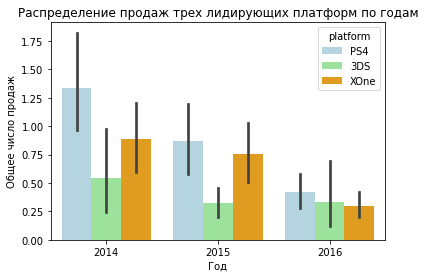

In [29]:
ax = sns.barplot(x='year_of_release',
            y='total_sales',
            hue="platform",
            data=current_data_top_platform,
            palette=['lightblue', 'lightgreen', 'orange'])
ax.set_title('Распределение продаж трех лидирующих платформ по годам')
ax.set(xlabel='Год', ylabel='Общее число продаж');

Лидирующей среди этих трёх платформ отказалась PS4. Так же мы вдим что на 2016г. продажи всех трех платфом падают.

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

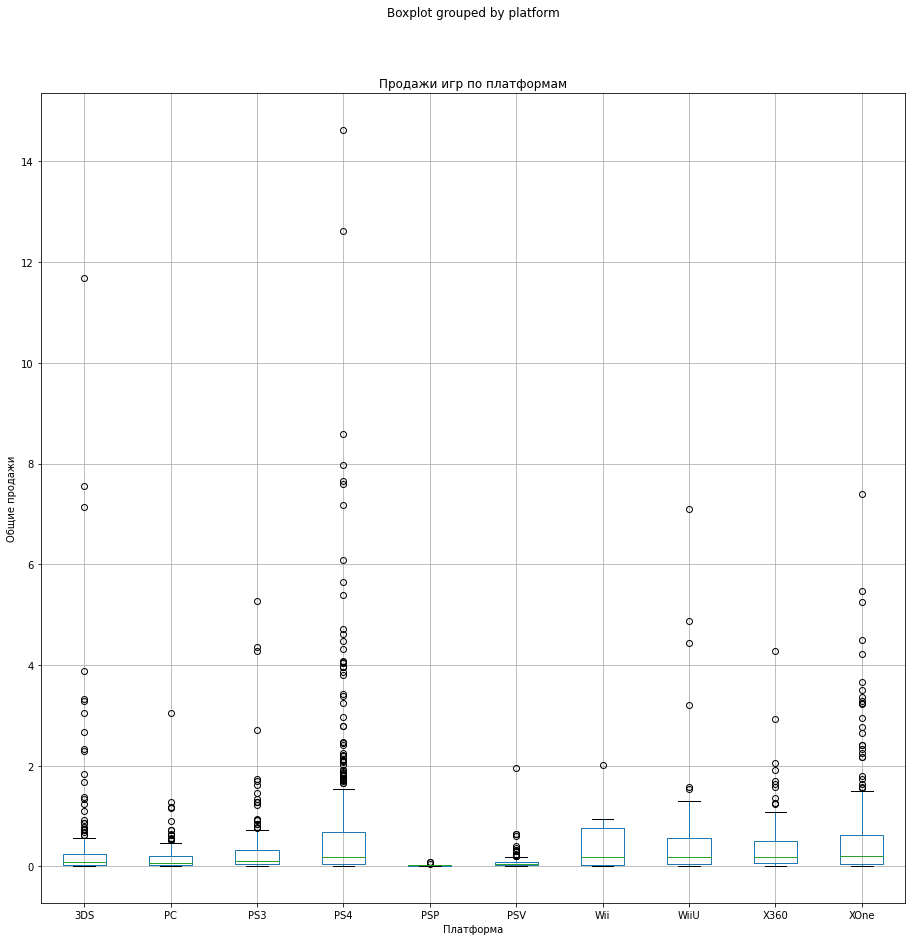

In [30]:
(
    current_data
    .boxplot(column='total_sales', by='platform', figsize=(15,15))
    .set(title='Продажи игр по платформам',xlabel='Платформа', ylabel='Общие продажи')
);

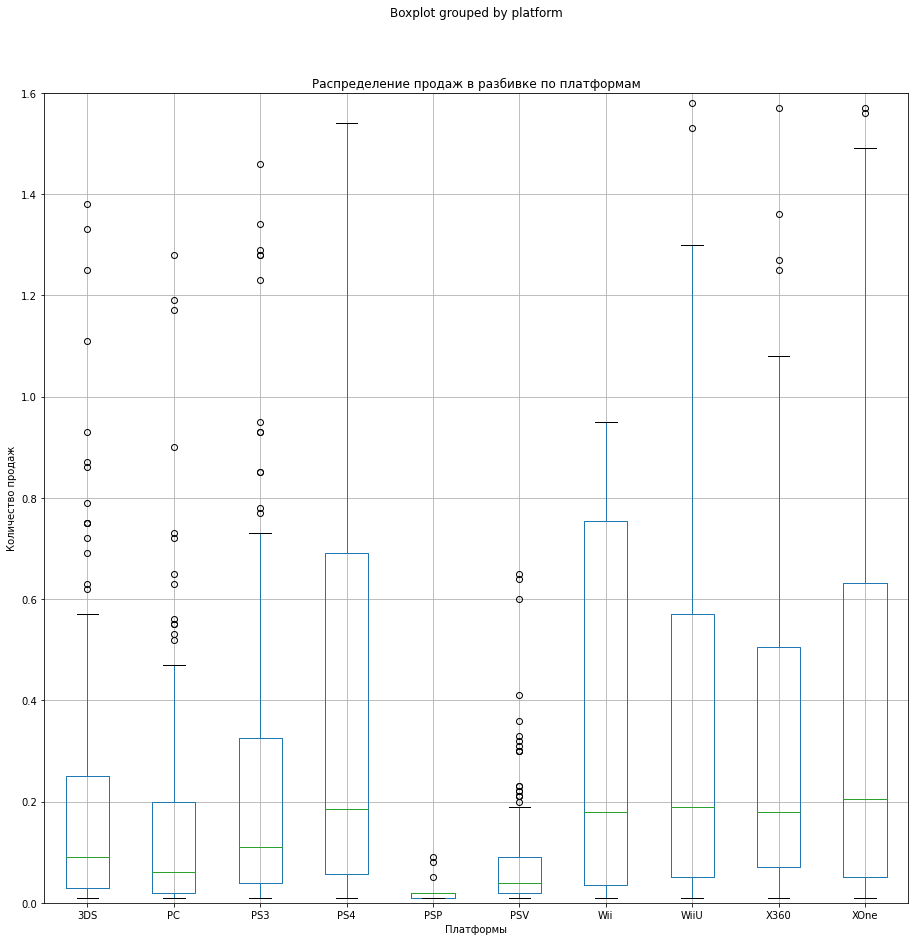

In [31]:
(
    current_data
    .boxplot(column='total_sales', by='platform', figsize=(15,15))
);
plt.title('Распределение продаж в разбивке по платформам')
plt.xlabel('Платформы')
plt.ylabel('Количество продаж')
plt.ylim(0, 1.6)
plt.show()

Постороив график «ящик с усами» мы видим, что на платформе PS4 разброс по количеству продаж наиболее высокий. Это нам говорит о том, что на этой платформе выходило большое количество игр бестселлеров, что обеспечило платформе хорошие показатели по продажам. Так же можно увидеть что стабильно хорошие показатели имеет платформа XOne, медиана продаж этой платформы выше чем у PS4. 

### Рассмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Возьмем в качестве примера платформу PS4. Ее жизненный цикл вписывается в рассматриваемый нами период и она является одной из лидирующих платформ на рынке

In [32]:
PS4_sales = current_data.query('platform == "PS4"').pivot_table(index='name', values=['total_sales', 'critic_score', 'user_score'])
PS4_sales

,critic_score,total_sales,user_score
name,,,
7 Days to Die,45.0,0.14,5.9
Adventure Time: Finn & Jake Investigations,NaN,0.10,NaN
Aegis of Earth: Protonovus Assault,57.0,0.02,7.8
Agatha Christie's The ABC Murders,67.0,0.02,6.2
Akiba's Trip: Undead & Undressed,NaN,0.11,NaN
...,...,...,...
Yakuza: Ishin,NaN,0.15,NaN
Yoru no Nai Kuni,NaN,0.08,NaN
ZombiU,NaN,0.06,NaN


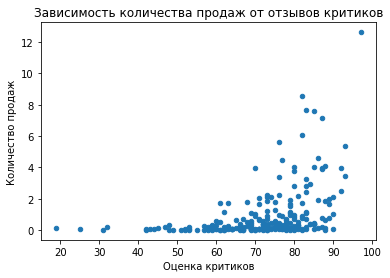

In [33]:
PS4_sales.plot(x='critic_score', y='total_sales', kind='scatter');
plt.title('Зависимость количества продаж от отзывов критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж');

In [34]:
PS4_sales['total_sales'].corr(PS4_sales['critic_score'])

0.4026614106810413

Видна умеренная прямая зависимость количества продаж игр от отзывов критиков.

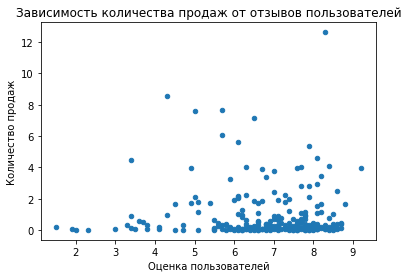

In [35]:
PS4_sales.plot(x='user_score', y='total_sales', kind='scatter');
plt.title('Зависимость количества продаж от отзывов пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество продаж');

In [36]:
PS4_sales['total_sales'].corr(PS4_sales['user_score'])

-0.04013158947269729

Мы видим что коэффициент корреляции менее чем на 10% отличается от нуля, что говорит нам об отсутствии какой бы то ни было существенной связи между отзывами поьзователей и числом продаж.

Соотнесем выводы с продажами игр на других платформах

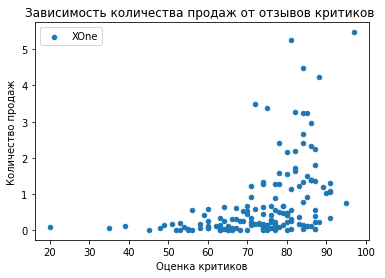

Коэфициент корреляции равен - 0.4286769437033322


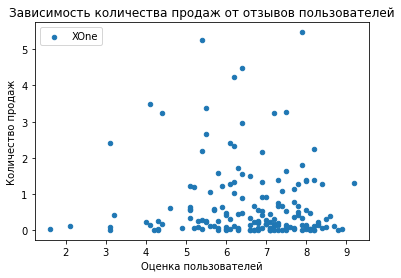

Коэфициент корреляции равен - -0.07038392806475818


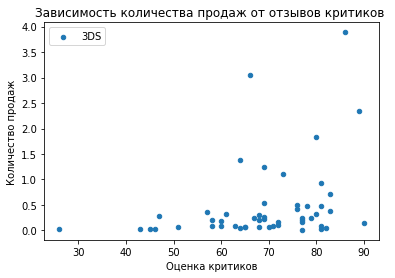

Коэфициент корреляции равен - 0.31411749286905105


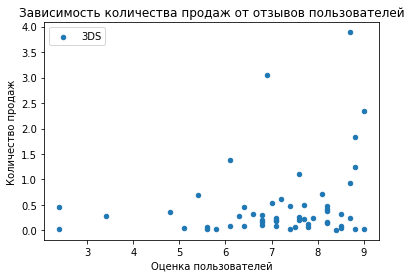

Коэфициент корреляции равен - 0.21519327185270284


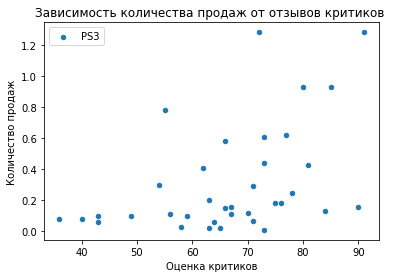

Коэфициент корреляции равен - 0.4465746049319071


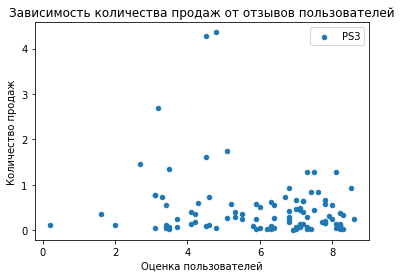

Коэфициент корреляции равен - -0.16676141347662107


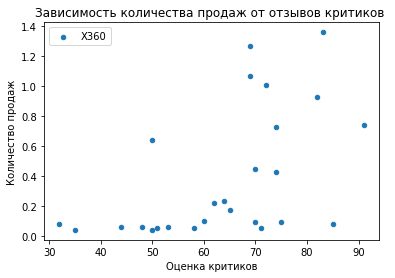

Коэфициент корреляции равен - 0.5257228356581521


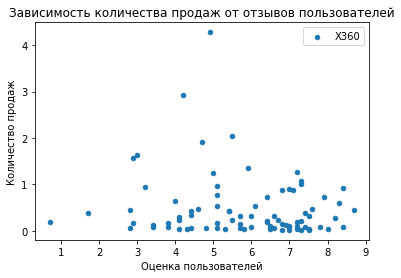

Коэфициент корреляции равен - -0.13844457094566495


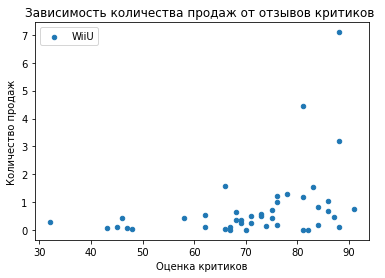

Коэфициент корреляции равен - 0.37020141248088384


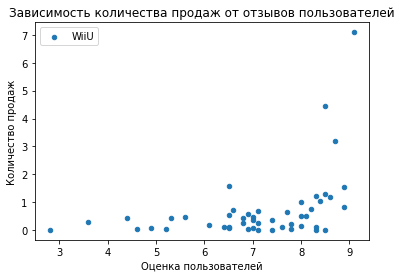

Коэфициент корреляции равен - 0.40792645792170773


In [37]:
top_platform_names = ['XOne', '3DS',  'PS3', 'X360', 'WiiU']
for platform in top_platform_names:
    platform_data = current_data.query('platform == @platform').pivot_table(index='name', values=['total_sales', 'critic_score', 'user_score'])
    platform_data.plot(x='critic_score', y='total_sales', kind='scatter', label=platform);
    plt.title('Зависимость количества продаж от отзывов критиков ')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Количество продаж');
    plt.show()
    
    critics_corr = platform_data['total_sales'].corr(platform_data['critic_score'])
    print(f'Коэфициент корреляции равен - {critics_corr}')
    
    platform_data.plot(x='user_score', y='total_sales', kind='scatter', label=platform);
    plt.title('Зависимость количества продаж от отзывов пользователей')
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Количество продаж');
    plt.show()
    
    users_corr = platform_data['total_sales'].corr(platform_data['user_score'])
    print(f'Коэфициент корреляции равен - {users_corr}')

Рассмотрев зависимости на других платформах мы видим примерно ту же картину: корреляция отзывов критиков и числа продаж игр на платформе положительная и умеренная, либо заметная в случае платформы X360, а корреляция отзывов пользователей и числа продаж слабая или вовсе отсутствует, за исключением платформы WiiU, где коэфициент корреляции составил 0,4, что говорит об умеренной связи.

### Посмотрим на общее распределение игр по жанрам

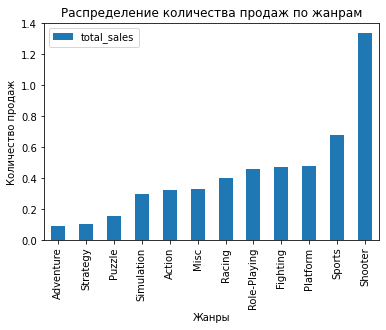

In [38]:
(
    current_data
    .pivot_table(index='genre', values='total_sales')
    .sort_values('total_sales')
    .plot(kind='bar', title='Распределение количества продаж по жанрам')
);
plt.xlabel('Жанры');
plt.ylabel('Количество продаж');

Наиболее продаваемым жанром среди игр является "Shooter", а последнее место занимает жанр "Adventure". Проверим, не связано ли это с количеством выпускаемых игр, так как если шутеров за рассматриваемый период было выпущено сильно больше чем игр приключений, результаты не показательны.          

In [39]:
current_data['genre'].value_counts()

Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64

Мы видим что количество игр в жанре приключения даже превышает количество игр в жанре шутер, а значит выводы, которые мы сделали на предыдущем шаге, верны.


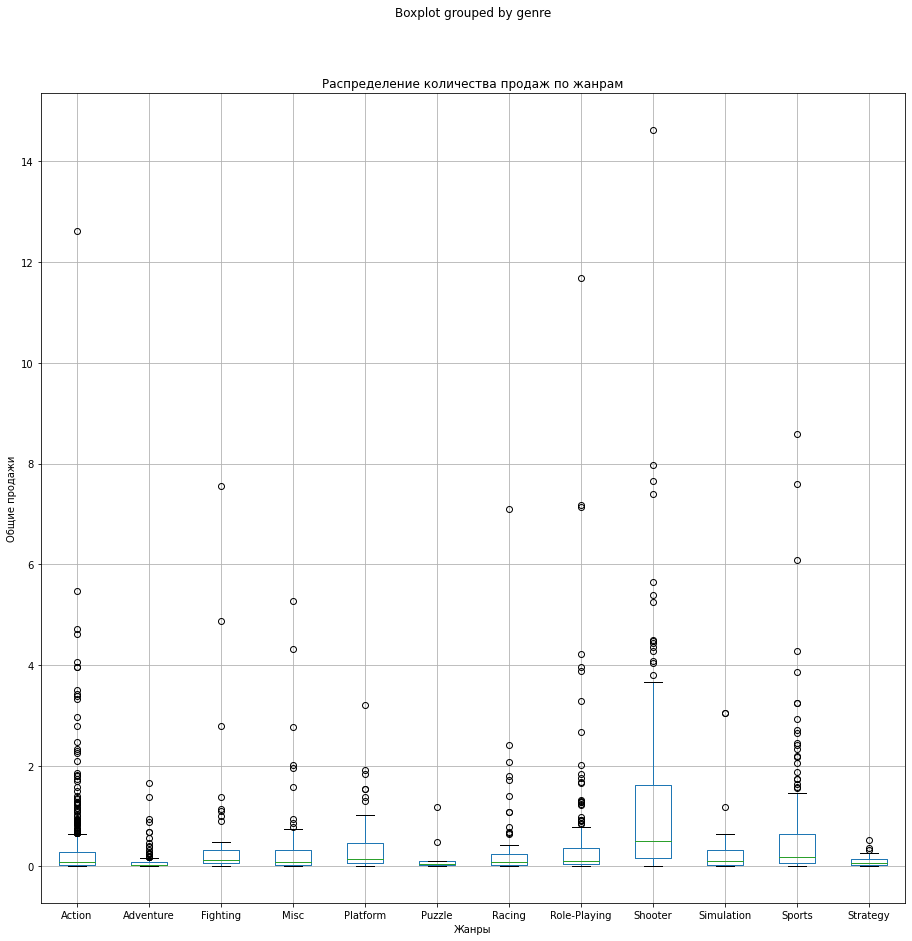

In [40]:
(
    current_data
    .boxplot(column='total_sales', by='genre', figsize=(15, 15))
    .set(title='Распределение количества продаж по жанрам',xlabel='Жанры', ylabel='Общие продажи')
);

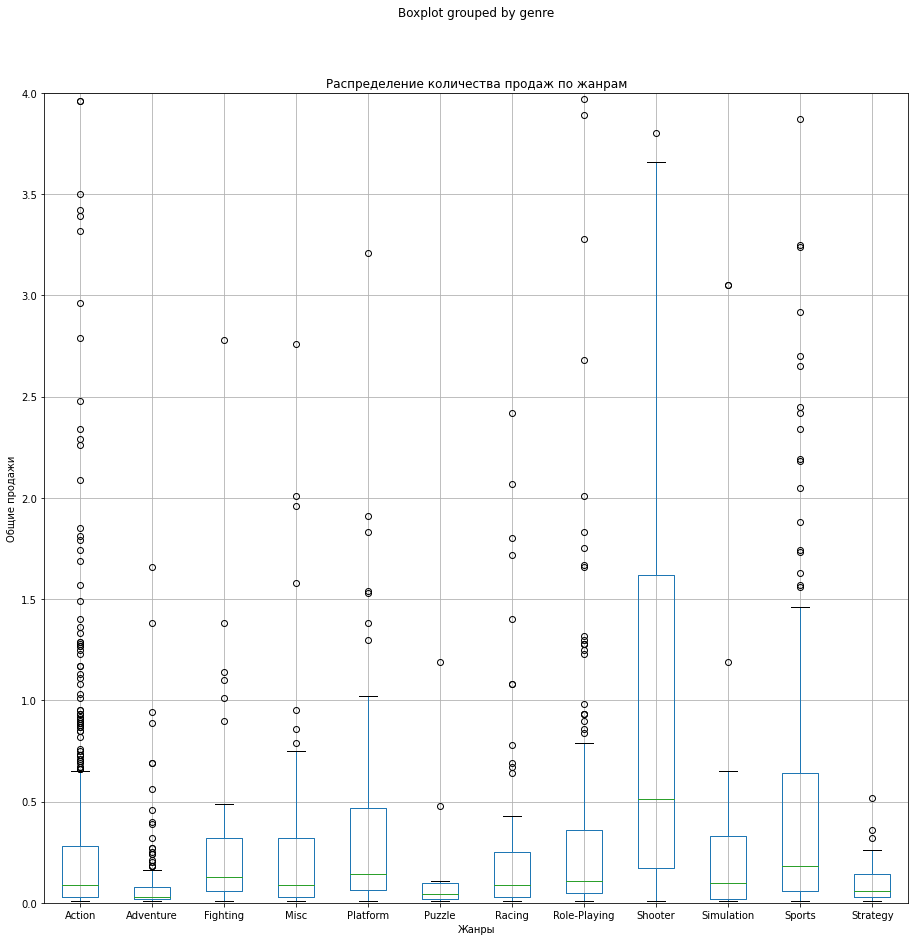

In [41]:
(
    current_data
    .boxplot(column='total_sales', by='genre', figsize=(15, 15))
    .set(title='Распределение количества продаж по жанрам',xlabel='Жанры', ylabel='Общие продажи', ylim=(0, 4))
);

Сравнивая медианы продаж мы так же видим, что Shooter является жанром со стабильно высоким спросом. Диаграммы размаха подтверждают ранее сделанные нами выводы.

## Составим портрет пользователя каждого региона

### Начнем с выявления топ-5 платформ для каждого региона 

In [42]:
current_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False)[:5]

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

Самымой популяпными платформами в Северной Америке являются PS4 и XOne. Последнее место в топе занимает PS3.

In [43]:
current_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)[:5]

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

В Европе PS4 так же лидирует, а X360 в топе вытеснила платформа PC.

In [44]:
current_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)[:5]

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

На японском рынке лидируют платформа 3DS. В отличие от  американского и европейского топа, в японский не вошли платформы X360 и XOne.

В Японии доля продаж игр знаительно ниже, чем в Северной Америке или Европе. Можно сделать вывод о том, что Американский рынок, среди анализируемых, является более приоритетным для производителей игр.

### Далее рассмотрим топ-5 жинров для каждого региона

In [45]:
current_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False)[:5]

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

Наиболее популярный жанр игр в Северной Америке - Action. Наименее популярный в топе - Role-Playing.

In [46]:
current_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)[:5]

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

Топ популярных жанров в Европе не отличается от Американского топа, за исключением последнего пятого места, где Role-Playing игры заменили игры жанра Racing

In [47]:
current_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)[:5]

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64

Японский топ жанров отличается от остальных. На первое место попали игры жанра Role-Playing, а последнее занял жанр Adventure. Игры жанров Action, Misc и Sports все так же присутствуют в топе. 

### Узнаем, влияет ли рейтинг ESRB на продажи

In [48]:
current_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

rating
M            96.42
no_rating    64.72
E            50.74
T            38.95
E10+         33.23
Name: na_sales, dtype: float64

In [49]:
current_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

rating
M            93.44
no_rating    58.95
E            58.06
T            34.07
E10+         26.16
Name: eu_sales, dtype: float64

In [50]:
current_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

rating
no_rating    56.90
T            14.78
E             8.94
M             8.01
E10+          4.46
Name: jp_sales, dtype: float64

Мы видим, что игры без рейтинга, то есть выпускаемые не для рынка США и Канады и не маркируемые организацией ESRB, пользуются спросом на американском и европейскойм рышке и занимают второе место в рейтинге. Игры с рейтингом М - для лиц старще 17 лет, занимают первое место на американском и европейском рынках, а рейтинг Е - для всех возрастных гатегорий, занимает третье место на всех трех рынках. На японском рынке первое место по продажам занимают игры без рейтнга, второе игры с рейтингом Т - для лиц старше 13 лет.

## Проверка гипотез

**Первая гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

```
H_0: Средний пользовательский рейтинг платформы Xbox One = средний пользовательский рейтинг PC`
H_1: Средний пользовательский рейтинг платформы Xbox One ≠ средний пользовательский рейтинг PC`
alpha = 0.05
```

In [52]:
user_score_XOne = current_data[current_data['platform'] =='X360']['user_score'].dropna()
user_score_PC = current_data[current_data['platform'] =='PC']['user_score'].dropna()
results = st.ttest_ind(
    user_score_XOne,
    user_score_PC,
    equal_var=False)

alpha = .05

print(results.pvalue) 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.0312821899616337
Отвергаем нулевую гипотезу


In [53]:
print(f'Средний пользовательский рейтинг платформы Xbox One равен', user_score_XOne.mean())
print(f'Средний пользовательский рейтинг платформы PC равен', user_score_PC.mean())

Средний пользовательский рейтинг платформы Xbox One равен 5.771084337349397
Средний пользовательский рейтинг платформы PC равен 6.298360655737705


Так как мы проверяем два средних значения на равенство, гипотиза является двухсторонеей, поэтому я сформулировала нулевую гипотезу о равенстве этих значений, и альтернативную гипотезу, ей противоречащую, которая будет принята верной в слуае опровержения нулевой. Для проверки гипотизы я использовала метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, при этом указав что их дисперсии не равны, так как у нас нет оснований полагать иначе. В итоге нулевую гипотезу опровергнуть не удалось, так как полученные нами данные ей не противоречат.


**Вторая гипотеза:** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

```
H_0: Средний пользовательский рейтинг игр в жанре Action = средний пользовательский рейтинг игр в жанре Sports`
H_1: Средний пользовательский рейтинг игр в жанре Action ≠ средний пользовательский рейтинг игр в жанре Sports`
alpha = 0.05
```

In [54]:
user_score_Action = current_data[current_data['genre'] =='Action']['user_score'].dropna()
user_score_Sports = current_data[current_data['genre'] =='Sports']['user_score'].dropna()
results = st.ttest_ind(
    user_score_Action,
    user_score_Sports,
    equal_var=False)

alpha = .05

print(results.pvalue) 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.1825550382644557e-14
Отвергаем нулевую гипотезу


In [55]:
print(f'Средний пользовательский рейтинг игр в жанре Action равен', user_score_Action.mean())
print(f'Средний пользовательский рейтинг игр в жанре Sports равен', user_score_Sports.mean())

Средний пользовательский рейтинг игр в жанре Action равен 6.760606060606061
Средний пользовательский рейтинг игр в жанре Sports равен 5.2251968503937


Не смотря на то, что формулировка гипотезы направлена на проверку того, разными ли являются значения среднего пользовательского рейтинга ирг жанров Action и Sports, нулевую гипотезу я сформулировала на основе равенства, чтобы опровергнув ее доказать различия. В итоге нулевая гипотеза была отвергнута, значит средние пользовательские рейтинги жанров Action и Sports действительно разные.

## Общий вывод

Мы проанализироали исторические данные о продажах игр разных жанров и на разных платформах. На основе проведенного анализа мы можем сделать следующие выводы, которые могут помочь нам спланировать кампанию на 2017-й год:
 - На 2016 год количество ежегодно выпускаемых игр идет на спад
 - Новые платформы появляются и исчезают примерно за 10 лет
 - Пик продаж игр на платформе приходится на начало либо середину её жизненного цикла
 - За последние 3 года по количеству продаж лидируют платформы PS4, XOne и 3DS, но к 2016 году игры на этих платформах все меньше пользуются спросом
 - Игры на платформе PS4 имеют высокие значения количества продаж
 - Отзывы критиков в больше степени влияют на продажи игр, чем отзывы пользователей
 - Наиболее продаваемым жанром среди игр является "Shooter"
 - Жанр Action занимает первое и второе место в топе по продажам на европейском и американском рынках, но проведенный анализ показывает что медиана продаж у этого жанра низкая, следовательно жанр популярен лишь за счет нескольких выстрелевших в этом жанре игр
 - Рынок Северной Америки имеет наибольшую долю продаж игр, по сравнению с Европой и Японией
 
Подытожив, можно сказать, что выбирая стратегию на 2017 год следует брать во внимание платформы, которые на данный момент пользуются спросом и показывают неплохие результаты продаж, такие как PS4 и Xbox One - относительно новые платформы, находящиеся примерно в середине своего жизненого цикла. Следует учитывать отзывы критиков, так как это влияет на спрос. Для рекламы и реализации лучше выбирать американкий или европейский рынок, так как у них значительно выше доля продаж. Так же следует брать в рассчет жанры игр, наиболее продаваемым жанром является Shooter. Для наибоьшего обхвата рынка следует выбирать игры с рейтингом M.         